<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/Week4_preclass_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

# Introduction to Machine Learning Pre-class assignment 1 Classification of irises
## [Problem 1] Select features and categories for practice

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Extract dataset

In [3]:
dataset = load_iris()

# 'Versicolor' and 'Virginica' are labelled 1 and 2, respectively
# sepal_length and petal_length at columns 0 and 2, respectively
X = dataset.data[dataset.target != 0][:, [0, 2]]
y = dataset.target[dataset.target != 0]
data = np.concatenate([X, y[:, np.newaxis]], axis=1)
df = pd.DataFrame(data, columns=['sepal_length', 'petal_length', 'label'])
df.head()

,sepal_length,petal_length,label
0,7.0,4.7,1.0
1,6.4,4.5,1.0
2,6.9,4.9,1.0
3,5.5,4.0,1.0
4,6.5,4.6,1.0


## [Problem 2] Data analysis

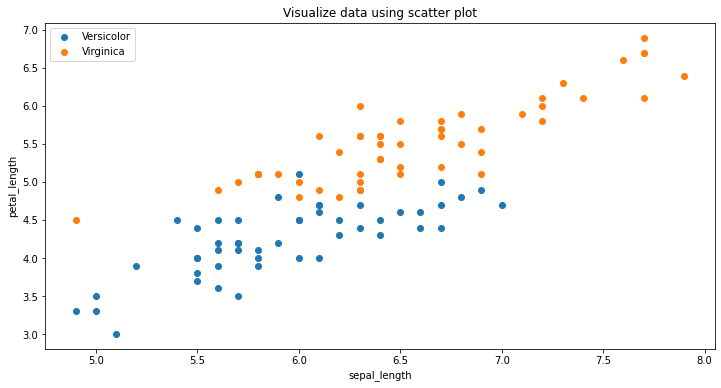

In [4]:
plt.figure(figsize=(12, 6))
plt.title("Visualize data using scatter plot")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.scatter(df[df['label'] == 1]['sepal_length'], df[df['label'] == 1]['petal_length'], label='Versicolor')
plt.scatter(df[df['label'] == 2]['sepal_length'], df[df['label'] == 2]['petal_length'], label='Virginica')
plt.legend()
plt.show()

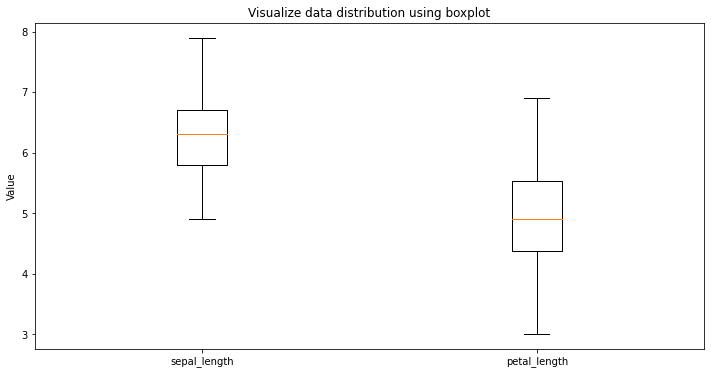

In [5]:
cols = ['sepal_length', 'petal_length']
plt.figure(figsize=(12, 6))
plt.title("Visualize data distribution using boxplot")
plt.ylabel("Value")
plt.boxplot([df[col] for col in cols], labels=cols)
plt.show()

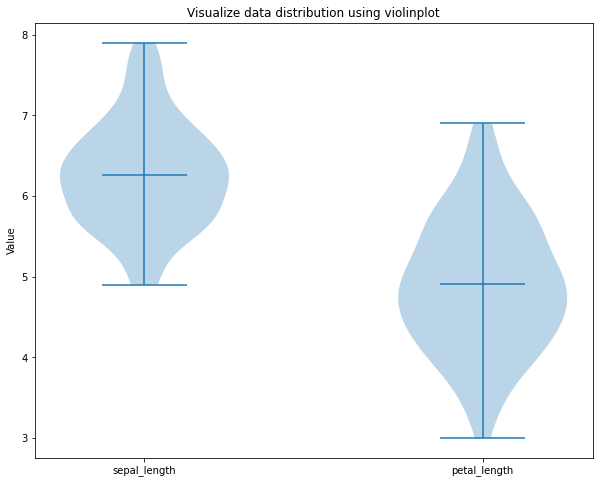

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Visualize data distribution using violinplot")
ax.set_ylabel("Value")
ax.violinplot([df[col] for col in cols], showmeans=True)
ax.set_xticks([1, 2])
ax.set_xticklabels(cols)
plt.show()

We can see that when considering only **Versicolor** and **Virginica**, the value distributions of **sepal_length** and **petal_length** overlap each other. Refering to last week plots, using 2 features (**sepal_length & petal_length**) is merely good for seperating **Setosa** from the rest, but pretty difficult for classifying **Versicolor** and **Virginica**.

## [Problem 3] Division of preprocessing/training data and verification data

In [7]:
from sklearn.model_selection import train_test_split

# Conver to ndarray
X, y = np.array(df.values[:, :-1]), np.array(df.values[:, -1])

# Split train/test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(75, 2) (25, 2) (75,) (25,)


## [Problem 4] Pretreatment/Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## [Problem 5] Learning and estimation

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Default 5 n_neighbors
model_5nn = KNeighborsClassifier()
model_5nn.fit(X_train, y_train)
y_predict_5nn = model_5nn.predict(X_val)
print(y_predict_5nn)

[1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]


In [10]:
# n_neighbors = 1
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_1nn.fit(X_train, y_train)
y_predict_1nn = model_1nn.predict(X_val)
print(y_predict_1nn)

[1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]


In [11]:
# n_neighbors = 3
model_3nn = KNeighborsClassifier(n_neighbors=3)
model_3nn.fit(X_train, y_train)
y_predict_3nn = model_3nn.predict(X_val)
print(y_predict_3nn)

[1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 1.]


## [Problem 6] Evaluation

KneighborsClassifier with 5-NN
Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


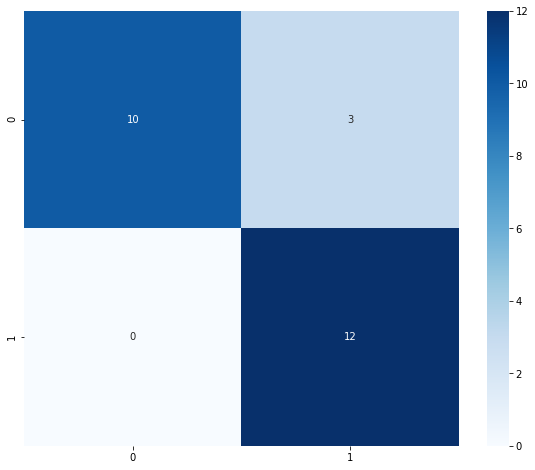

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# 4 score of model KNeighborsClassifier with n_neighbors = 5
accuracy_5nn = accuracy_score(y_val, y_predict_5nn)
precision_5nn = precision_score(y_val, y_predict_5nn)
recall_5nn = recall_score(y_val, y_predict_5nn)
f1_score_5nn = f1_score(y_val, y_predict_5nn)
conf_mat_5nn = confusion_matrix(y_val, y_predict_5nn)

print("KneighborsClassifier with 5-NN")
print(f"Accuracy score: {accuracy_5nn:.2f}")
print(f"Precision score: {precision_5nn:.2f}")
print(f"Recall score: {recall_5nn:.2f}")
print(f"F1 score: {f1_score_5nn:.2f}")
print("Confusion matrix:\n", conf_mat_5nn)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_5nn, cmap="Blues", annot=True, square=True)
plt.show()

KneighborsClassifier with 1-NN
Accuracy score: 0.84
Precision score: 0.91
Recall score: 0.77
F1 score: 0.83
Confusion matrix:
 [[10  3]
 [ 1 11]]


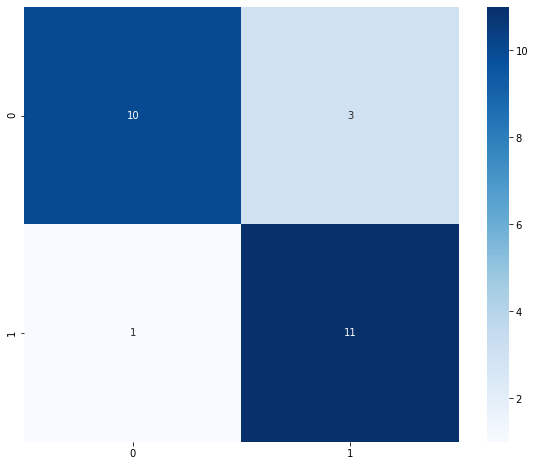

In [13]:
# 4 score of model KNeighborsClassifier with n_neighbors = 1
accuracy_1nn = accuracy_score(y_val, y_predict_1nn)
precision_1nn = precision_score(y_val, y_predict_1nn)
recall_1nn = recall_score(y_val, y_predict_1nn)
f1_score_1nn = f1_score(y_val, y_predict_1nn)
conf_mat_1nn = confusion_matrix(y_val, y_predict_1nn)

print("KneighborsClassifier with 1-NN")
print(f"Accuracy score: {accuracy_1nn:.2f}")
print(f"Precision score: {precision_1nn:.2f}")
print(f"Recall score: {recall_1nn:.2f}")
print(f"F1 score: {f1_score_1nn:.2f}")
print("Confusion matrix:\n", conf_mat_1nn)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_1nn, cmap="Blues", annot=True, square=True)
plt.show()

KneighborsClassifier with 3-NN
Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


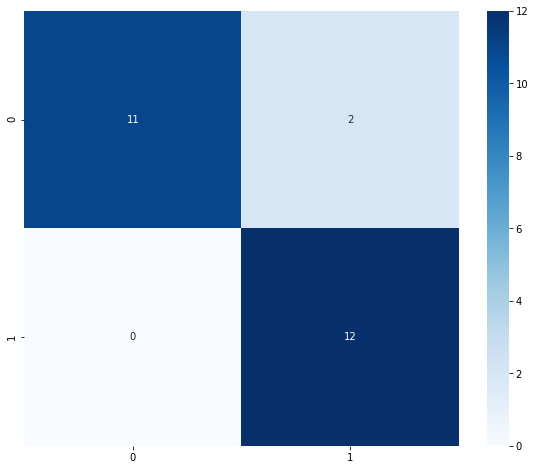

In [14]:
# 4 score of model KNeighborsClassifier with n_neighbors = 3
accuracy_3nn = accuracy_score(y_val, y_predict_3nn)
precision_3nn = precision_score(y_val, y_predict_3nn)
recall_3nn = recall_score(y_val, y_predict_3nn)
f1_score_3nn = f1_score(y_val, y_predict_3nn)
conf_mat_3nn = confusion_matrix(y_val, y_predict_3nn)

print("KneighborsClassifier with 3-NN")
print(f"Accuracy score: {accuracy_3nn:.2f}")
print(f"Precision score: {precision_3nn:.2f}")
print(f"Recall score: {recall_3nn:.2f}")
print(f"F1 score: {f1_score_3nn:.2f}")
print("Confusion matrix:\n", conf_mat_3nn)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_3nn, cmap="Blues", annot=True, square=True)
plt.show()

**Accuracy score**: The ratio of number of correct predictions to the total number of input samples

$$Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions made}}$$

**Precision score**: The ratio of number of correctly predicted positive observations to the total number of predicted positive observations

$$Precision = \frac{\text{True Positive}}{\text{True Positive + False Positive}}$$

**Recall score**: The ratio of number of correctly predicted positive observations to the total number of truly positive observations

$$Recall = \frac{\text{True Positive}}{\text{True Positive + False Negative}}$$

**F1 score**: The harmonic mean of Precision and Recall, it seeks for balance between the two

$$F1 = \frac{2 * \text{Precision} * \text{Recall}}{\text{Precision + Recall}}$$

## [Problem 7] Visualization

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

Visualize decision region of KNeighborsClassifier 5-NN
Train dataset


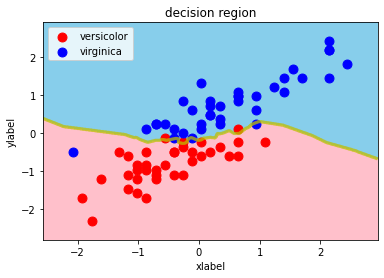

Validation dataset


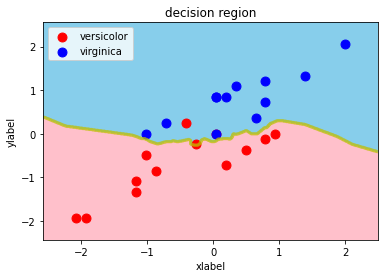

In [16]:
print("Visualize decision region of KNeighborsClassifier 5-NN")
print("Train dataset")
decision_region(X_train, y_train, model_5nn)
print("Validation dataset")
decision_region(X_val, y_val, model_5nn)

Visualize decision region of KNeighborsClassifier 1-NN
Train dataset


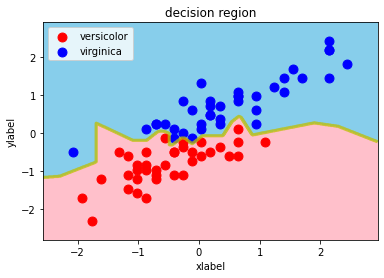

Validation dataset


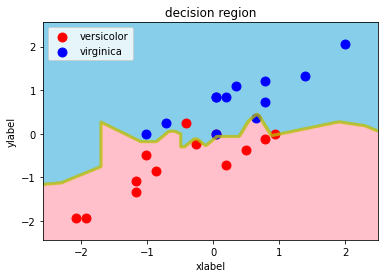

In [17]:
print("Visualize decision region of KNeighborsClassifier 1-NN")
print("Train dataset")
decision_region(X_train, y_train, model_1nn)
print("Validation dataset")
decision_region(X_val, y_val, model_1nn)

Visualize decision region of KNeighborsClassifier 3-NN
Train dataset


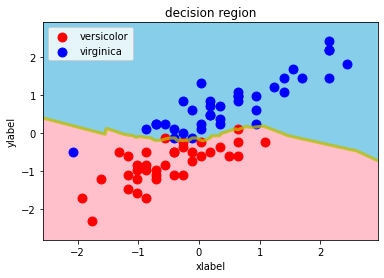

Validation dataset


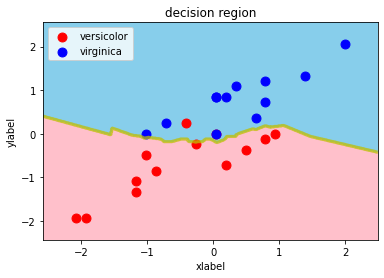

In [18]:
print("Visualize decision region of KNeighborsClassifier 3-NN")
print("Train dataset")
decision_region(X_train, y_train, model_3nn)
print("Validation dataset")
decision_region(X_val, y_val, model_3nn)

## [Problem 8] Learning by other methods

Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


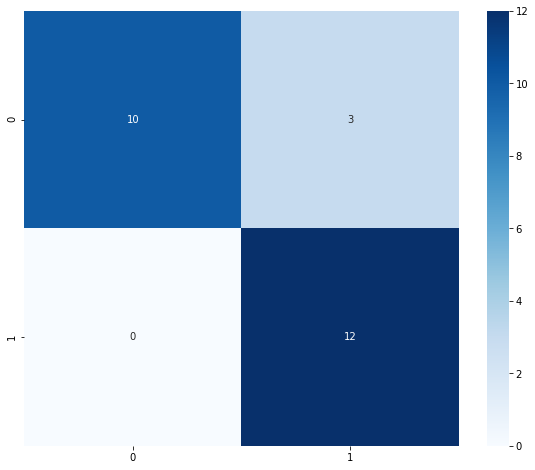

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def score_metrics(y_true, y_pred, average='binary'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    conf_mat = confusion_matrix(y_true, y_pred)
    print(f"Accuracy score: {accuracy:.2f}")
    print(f"Precision score: {precision:.2f}")
    print(f"Recall score: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print("Confusion matrix:\n", conf_mat)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_mat, cmap="Blues", annot=True, square=True)
    plt.show()
    return np.array([accuracy, precision, recall, f1])

knn_scores = score_metrics(y_val, y_predict_5nn)

### Logistic Regression

Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


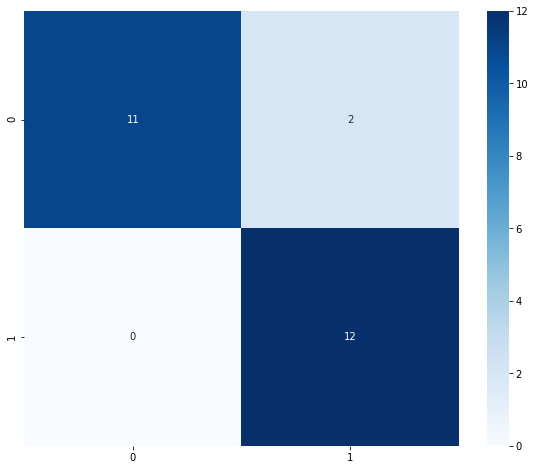

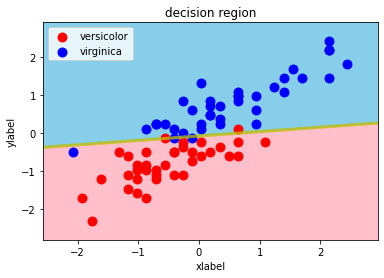

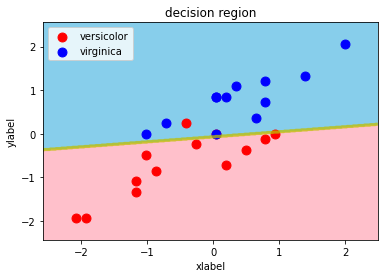

In [20]:
lor = LogisticRegression()
lor.fit(X_train, y_train)
y_predict_lor = lor.predict(X_val)
lor_scores = score_metrics(y_val, y_predict_lor)
decision_region(X_train, y_train, lor)
decision_region(X_val, y_val, lor)

### Support Vector Classifier

Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


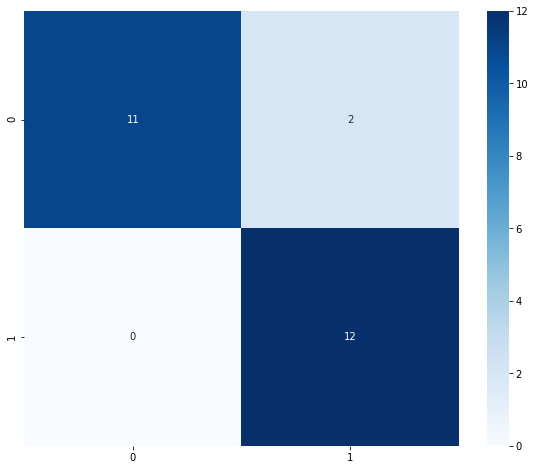

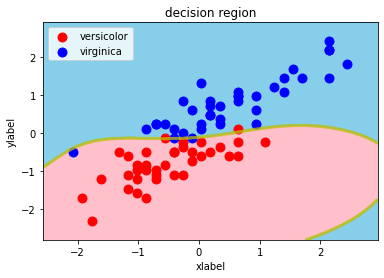

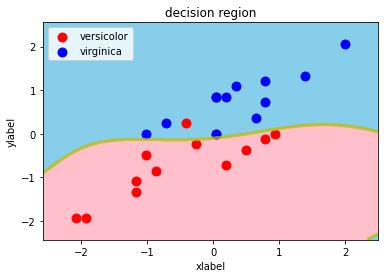

In [21]:
svc = SVC()
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(X_val)
svc_scores = score_metrics(y_val, y_predict_svc)
decision_region(X_train, y_train, svc)
decision_region(X_val, y_val, svc)

### Decision Tree Classifier

Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


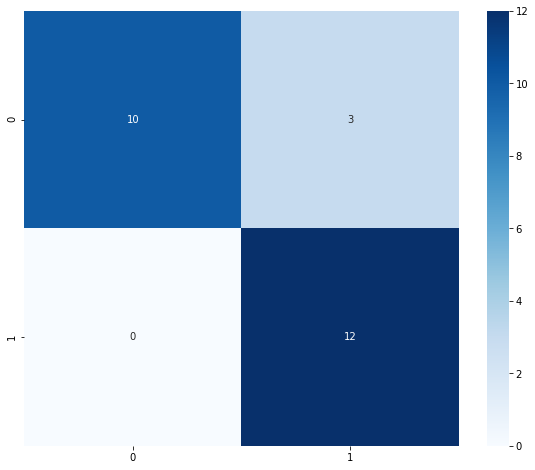

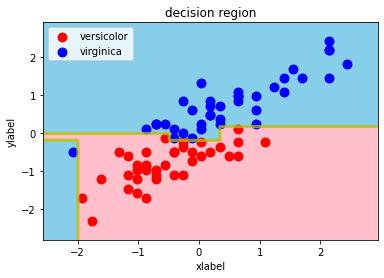

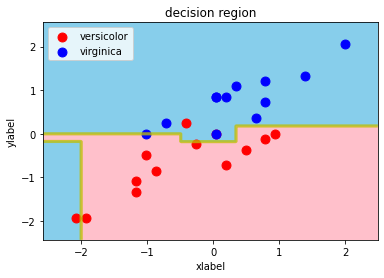

In [22]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_predict_tree = tree.predict(X_val)
tree_scores = score_metrics(y_val, y_predict_tree)
decision_region(X_train, y_train, tree)
decision_region(X_val, y_val, tree)

### Random Forest Classifier

Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


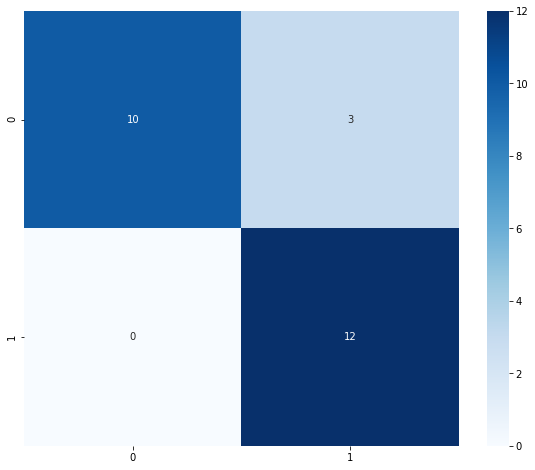

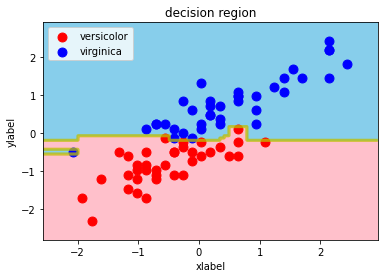

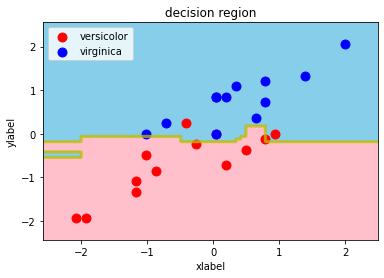

In [23]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_predict_forest = forest.predict(X_val)
forest_scores = score_metrics(y_val, y_predict_forest)
decision_region(X_train, y_train, forest)
decision_region(X_val, y_val, forest)

### Compare

In [24]:
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1_score']
model_names = ['KNeighbors (5-NN)', 'LogisticRegression', 'SVC', 'DecisionTree', 'RandomForest']
combine = np.vstack([knn_scores, lor_scores, svc_scores, tree_scores, forest_scores])
index_df = pd.DataFrame(combine, index=model_names, columns=score_labels)
index_df

,Accuracy,Precision,Recall,F1_score
KNeighbors (5-NN),0.88,1.0,0.769231,0.869565
LogisticRegression,0.92,1.0,0.846154,0.916667
SVC,0.92,1.0,0.846154,0.916667
DecisionTree,0.88,1.0,0.769231,0.869565
RandomForest,0.88,1.0,0.769231,0.869565


*   Logistic Regression and SVC have highest Accuracy score 0.92 and Recall score 0.846, Logistic Regression has a straight line decision region which simpler than the others.
*   All models have full score of Precision
*   Decision Tree and Random Forest have similiar kind of decision region (combine of straight lines), KNN has more random region pattern while SVC looks like a curve



## [Problem 9] (Advanced task) Comparison with and without standardization

In [25]:
# Reload X, y without using standardization
def train_model(X_train, y_train, X_val, y_val, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    scores = score_metrics(y_val, y_pred)
    decision_region(X_train, y_train, model)
    decision_region(X_val, y_val, model)
    return scores

# Reload data no standardization
X, y = np.array(df.values[:, :-1]), np.array(df.values[:, -1])
X_train_no_scale, X_val_no_scale, y_train_no_scale, y_val_no_scale = train_test_split(X, y, test_size=0.25, random_state=0)

Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


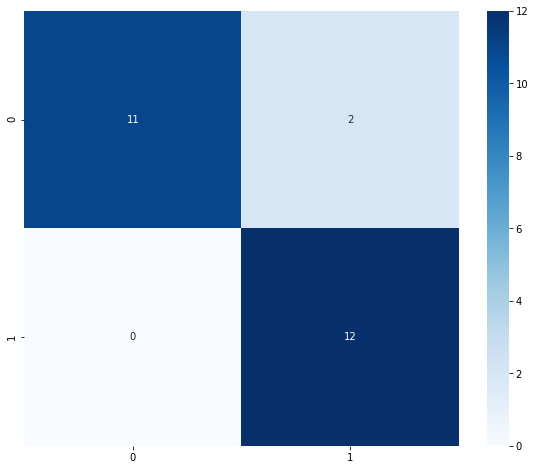

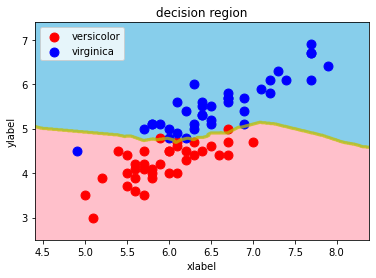

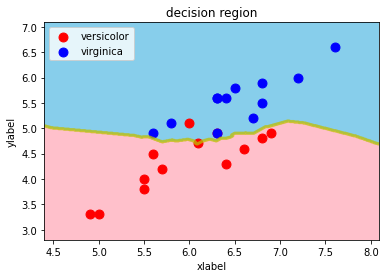

Accuracy score: 0.88
Precision score: 1.00
Recall score: 0.77
F1 score: 0.87
Confusion matrix:
 [[10  3]
 [ 0 12]]


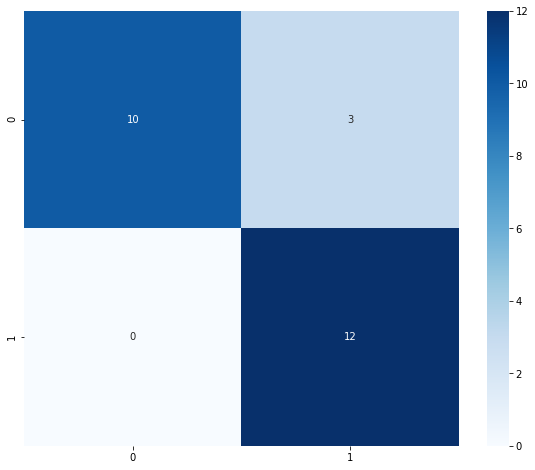

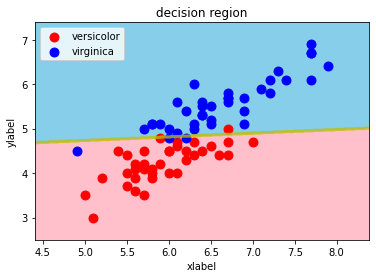

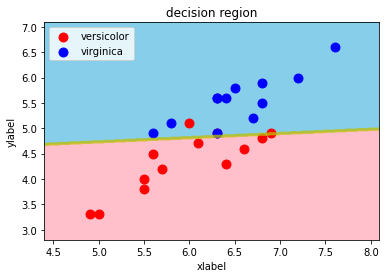

Accuracy score: 0.92
Precision score: 1.00
Recall score: 0.85
F1 score: 0.92
Confusion matrix:
 [[11  2]
 [ 0 12]]


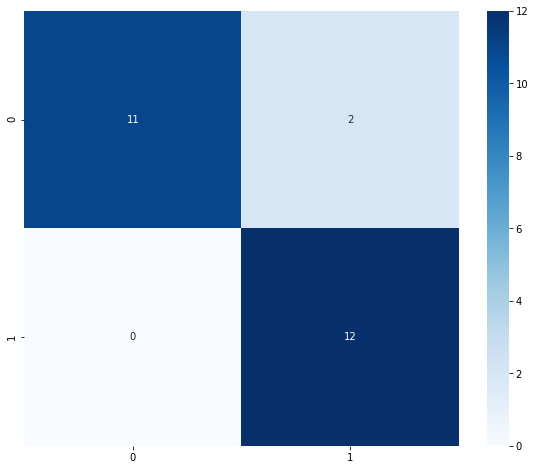

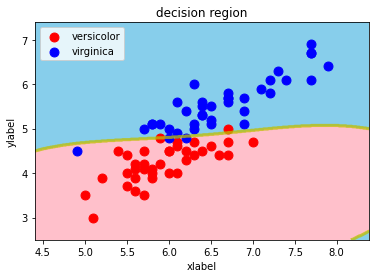

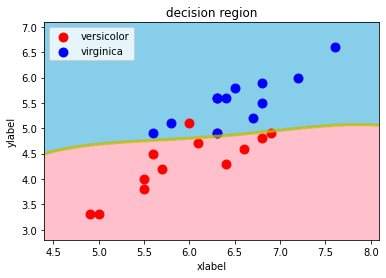

Accuracy score: 0.84
Precision score: 0.91
Recall score: 0.77
F1 score: 0.83
Confusion matrix:
 [[10  3]
 [ 1 11]]


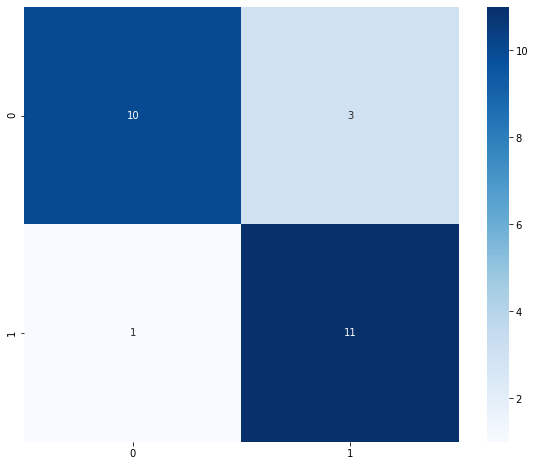

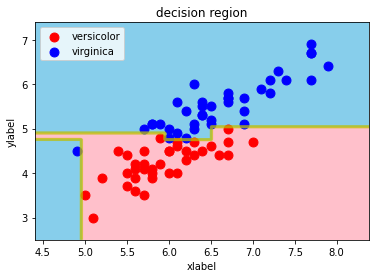

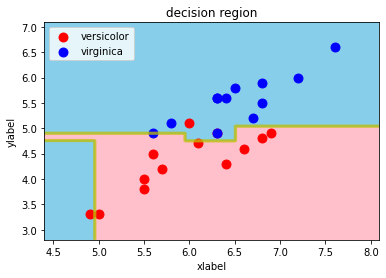

Accuracy score: 0.84
Precision score: 1.00
Recall score: 0.69
F1 score: 0.82
Confusion matrix:
 [[ 9  4]
 [ 0 12]]


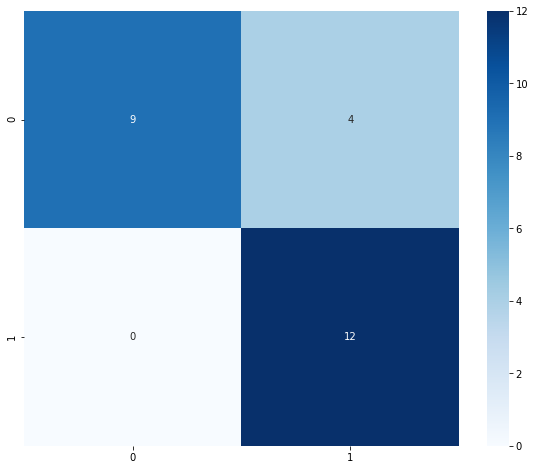

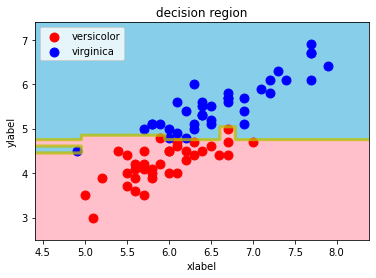

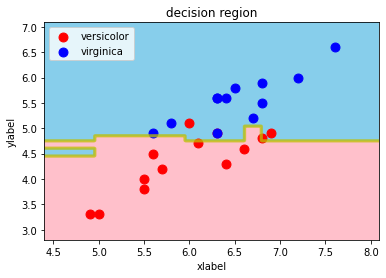

,Accuracy,Precision,Recall,F1_score
KNeighbors (5-NN),0.92,1.000000,0.846154,0.916667
LogisticRegression,0.88,1.000000,0.769231,0.869565
SVC,0.92,1.000000,0.846154,0.916667
DecisionTree,0.84,0.909091,0.769231,0.833333
RandomForest,0.84,1.000000,0.692308,0.818182


In [26]:
scores = np.vstack([train_model(X_train_no_scale, y_train_no_scale, X_val_no_scale, y_val_no_scale, KNeighborsClassifier()),
                    train_model(X_train_no_scale, y_train_no_scale, X_val_no_scale, y_val_no_scale, LogisticRegression()),
                    train_model(X_train_no_scale, y_train_no_scale, X_val_no_scale, y_val_no_scale, SVC()),
                    train_model(X_train_no_scale, y_train_no_scale, X_val_no_scale, y_val_no_scale, DecisionTreeClassifier()),
                    train_model(X_train_no_scale, y_train_no_scale, X_val_no_scale, y_val_no_scale, RandomForestClassifier())])
index_df = pd.DataFrame(scores, index=model_names, columns=score_labels)
index_df

Standardization helps balance/normalize features values to normal distribution, prevents from a feature having a large variance that dominates the objective function.

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region_multiclass(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['Setosa', 'versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lime']
    n_class = len(set(y))
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [28]:
# Load all classes
all_X = dataset.data[:, [0, 2]]
all_y = dataset.target

all_X_train, all_X_val, all_y_train, all_y_val = train_test_split(all_X, all_y, test_size=0.25, random_state=0)
s = StandardScaler()
all_X_train = s.fit_transform(all_X_train)
all_X_val = s.transform(all_X_val)

Accuracy score: 0.95
Precision score: 0.95
Recall score: 0.95
F1 score: 0.95
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


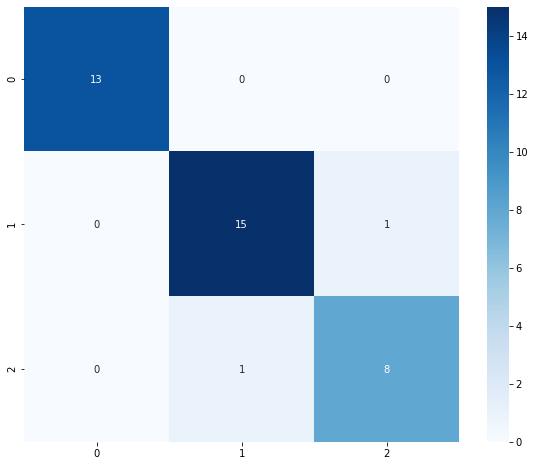

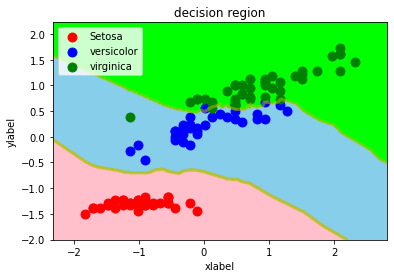

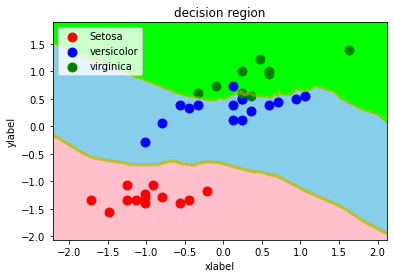

Accuracy score: 0.89
Precision score: 0.89
Recall score: 0.89
F1 score: 0.89
Confusion matrix:
 [[13  0  0]
 [ 0 14  2]
 [ 0  2  7]]


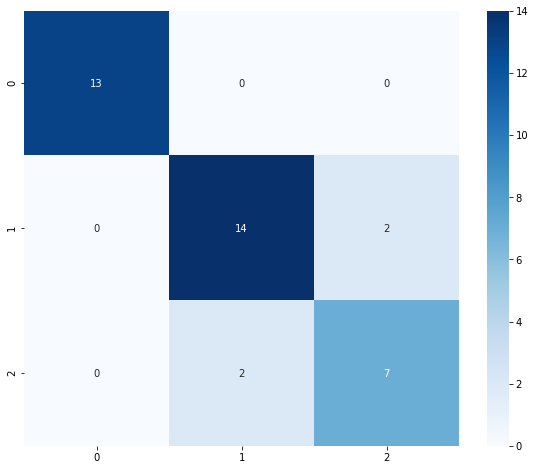

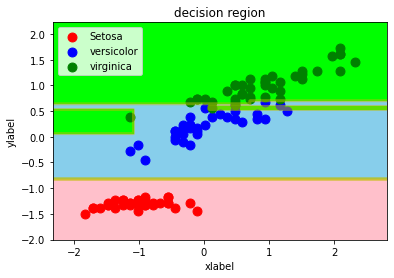

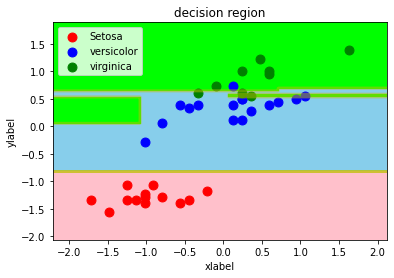

Accuracy score: 0.92
Precision score: 0.92
Recall score: 0.92
F1 score: 0.92
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  2  7]]


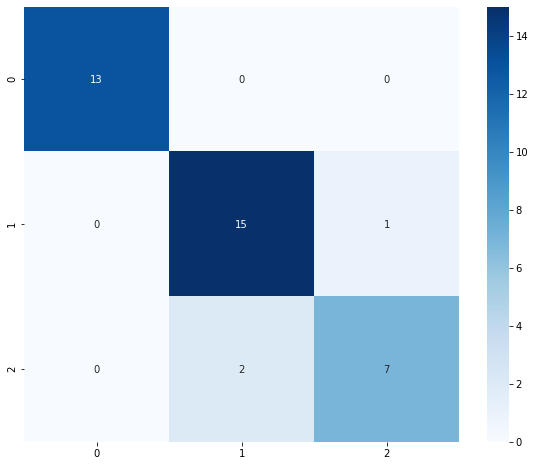

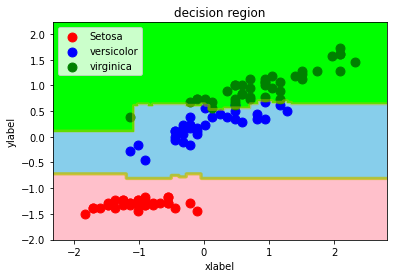

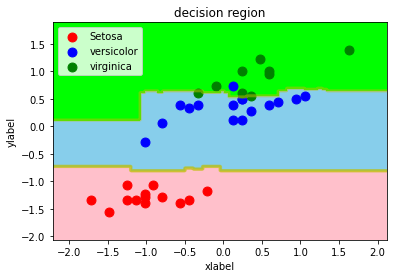

,Accuracy,Precision,Recall,F1_score
KNeighbors (5-NN),0.947368,0.947368,0.947368,0.947368
Decision Tree,0.894737,0.894737,0.894737,0.894737
Random Forest,0.921053,0.921053,0.921053,0.921053


In [29]:
def train_model_multiclass(X_train, y_train, X_val, y_val, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    scores = score_metrics(y_val, y_pred, 'micro')
    decision_region_multiclass(X_train, y_train, model)
    decision_region_multiclass(X_val, y_val, model)
    return scores


scores = np.vstack([train_model_multiclass(all_X_train, all_y_train, all_X_val, all_y_val, KNeighborsClassifier()),
                    train_model_multiclass(all_X_train, all_y_train, all_X_val, all_y_val, DecisionTreeClassifier()),
                    train_model_multiclass(all_X_train, all_y_train, all_X_val, all_y_val, RandomForestClassifier())])
index_df = pd.DataFrame(scores, index=['KNeighbors (5-NN)', 'Decision Tree', 'Random Forest'], columns=score_labels)
index_df